In [36]:
import torchdata
import torch
from gensim.models import FastText
import pandas as pd
import re
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import spacy
from transformers import AutoModel, AutoTokenizer

from tqdm.auto import tqdm

IGNORE_SAVED_FILES = True
print(torch.__version__, torch.cuda.is_available())

1.12.0+cu116 True


In [2]:
with open('./../Data/anek_utf8/anek_utf8.txt', 'r', encoding='utf-8') as f:
    data = f.read()

In [3]:
data_r =  data.replace('<|startoftext|>', '').split('\n\n')

In [4]:
def bad_patterns_to_tags_replaser2(text: str):
    text = re.sub(r'\d+\:\d+\:\d+', ' <TIME> ', text)
    text = re.sub(r'\d+\:\d+', ' <TIME> ', text)
    text = re.sub(r'\+{,1}\d{1,3}\({,1}[\-\s]{,1}\d{3}\){,1}[\-\s]{,1}\d{3}[\-\s]{,1}\d{2}[\-\s]{,1}\d{2}', ' <PHONE> ', text)
    text = re.sub('\d+/\d+/\d+', ' <DATE> ', text)
    text = re.sub('\d+-\d+-\d+', ' <DATE> ', text)
    text = re.sub('\d+th', ' <ENUM> ', text)
    text = re.sub('\d+rd', ' <ENUM> ', text)
    text = re.sub('\d+st', ' <ENUM> ', text)
    text = re.sub('[\+\-]?\d+.\d+', ' <NUM> ', text)
    text = re.sub('[\+\-]?\d+,\d+', ' <NUM> ', text)
    text = re.sub('\d+', ' <NUM> ', text)
    # text = re.sub(r'\w+\.', '<SHORT>', text[0:-1]) + '.'
    text = re.sub(',', ' , ', text)
    text = re.sub(';', ' ; ', text)
    text = re.sub(';', ' ; ', text)
    text = re.sub('-', ' - ', text)
    text = re.sub(':', ' : ', text)
    text = re.sub('\?', ' \? ', text)
    text = re.sub('"', ' " ', text)
    text = re.sub("'", " ' ", text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub('\.', ' . ', text)
    text = re.sub('\(', ' ( ', text)
    text = re.sub('\)', ' ) ', text)
    text = re.sub('\.  \.  \.', ' ... ', text)
    text = re.sub('\s+', ' ', text)
    return text[0:-1]

In [10]:
tags = ['<SOS>', '<EOS>', '<PAD>', '<UNK>', '<NAN>', '<NUM>', '<TIME>', '<ENUM>', '<DATE>', '<PHONE>', '<EMAIL>', '<SHORT>', '<NAME>']
tags_value = pd.DataFrame({'values': [i / (1+len(tags)) for i in range(1, 1+len(tags))]}, index=tags,)
tags_value.loc['<SOS>', 'values']


0.07142857142857142

In [5]:
data_c =list(map(bad_patterns_to_tags_replaser2, data_r))

In [6]:
lengthes = np.array(list(map(lambda a: len(a.split(' ')), data_c)))


(array([ 7476., 36989., 35532., 21685., 10836.,  5528.,  2474.,   871.,
          219.,    42.]),
 array([ 2., 10., 18., 26., 34., 42., 50., 58., 66., 74., 82.]),
 <BarContainer object of 10 artists>)

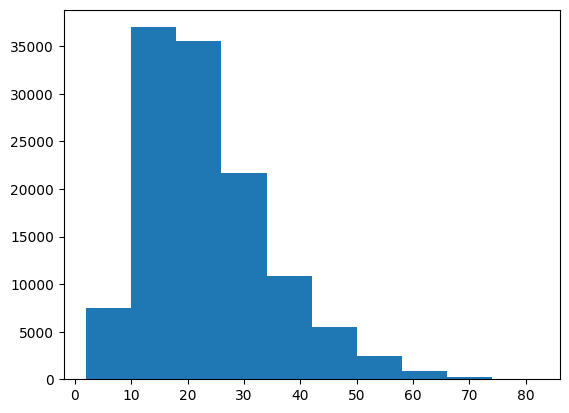

In [7]:
plt.hist(lengthes)

In [16]:
data_s = []
for i in data_c:
    data_s += i.split()
vocab = pd.Series(pd.Series(data_s).unique())
vocab = vocab[vocab.apply(lambda a: a not in tags)]
vocab = pd.concat([pd.Series(tags), vocab])

In [17]:
vocab.shape

(169524,)

# Procressing texts

In [31]:
def text_norm(text, l=30, sos='<SOS>', eos='<EOS>', pad='<PAD>'):
    text_shorted = text[0:l]
    text_padded = [sos] + text_shorted + [eos] + [pad for _ in range(l-len(text_shorted))]
    return text_padded

In [32]:
def text_tokenize(text):
    return [vocab[vocab==i].index[0] for i in text]


In [33]:
data_splited = pd.Series(data_c).apply(lambda a: a.split())


In [34]:
data_splited.apply(text_norm).apply(len).max(), data_splited.apply(text_norm).apply(len).min() 

(32, 32)

In [39]:
t_d = []
for i in tqdm(data_splited.apply(text_norm)):
    t_d.append(text_tokenize(i))

  0%|          | 60/121652 [00:36<20:37:46,  1.64it/s]


KeyboardInterrupt: 

In [37]:
data_splited.apply(text_norm).apply(text_tokenize)

KeyboardInterrupt: 